In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from misc import *
from scipy.signal import stft, blackman, hann, chirp
from math import inf, pi
import pandas as pd


datapath = './../../audio/reduzidas'

In [2]:
wlen = 512
win = hann(wlen)
nfft = 1024
threshold = 5
fs =22050 
audio = chirp(np.linspace(0,220, 200000), 0, 50, 100)
t, f, spec = stft(audio, fs, win, wlen, wlen/2, nfft)
# spec = processSpec(spec, win, wlen, threshold)
spec = abs(spec)
print(spec.shape)

(513, 783)


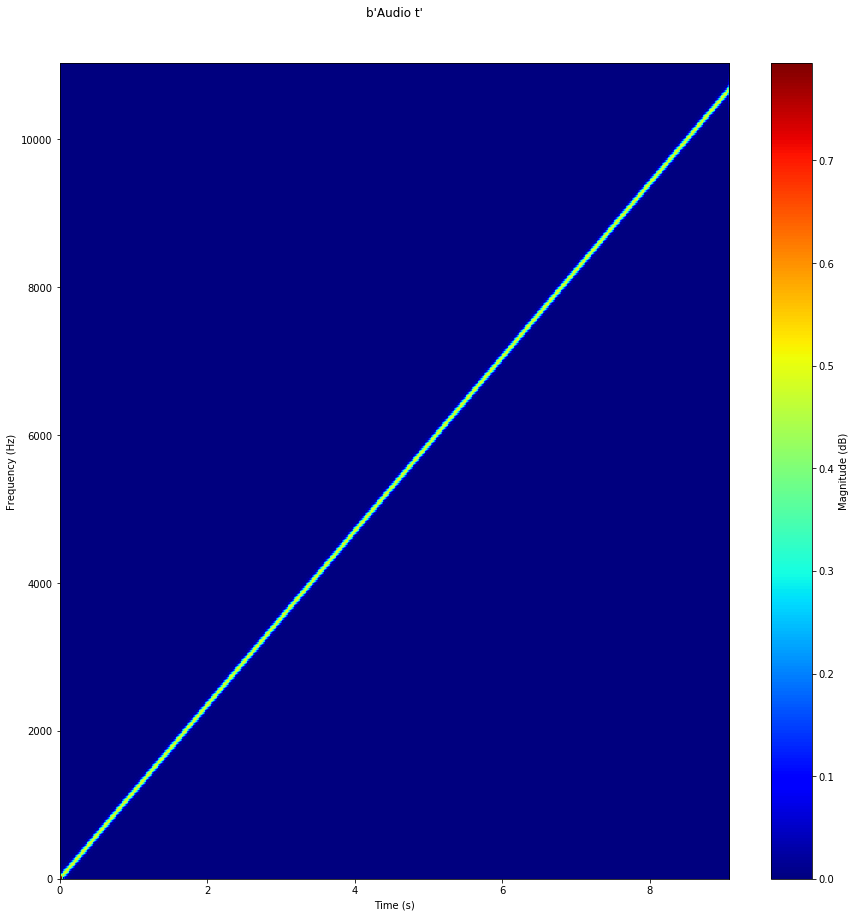

In [3]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(15,15))
plt.subplots_adjust(hspace=0.45)
# power = processSpec(spec, wlen, 0)
plot_spec(spec, f, t, "Audio teste", ax)

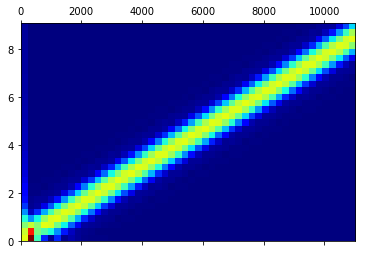

In [4]:
%matplotlib inline
fig, ax = plt.subplots()
h = ax.matshow(spec[:34, :50], 
               interpolation="nearest",
               extent=[t.min(), t.max(), f.min(), f.max()],
               aspect="auto",
               origin = 'lower',
               cmap="jet")

In [5]:
# power = processed_spec_map['Brandenburg Concerto No. 3 In G Major- I-Allegro_RED.wav']
# f, t , Sxx = spec_map['Brandenburg Concerto No. 3 In G Major- I-Allegro_RED.wav']
power = spec
abs_value = np.absolute(power)
     
indexes = np.where(spec>.2)

In [6]:
indexes

(array([  0,   0,   0, ..., 496, 497, 497], dtype=int32),
 array([  0,   1,   2, ..., 781, 780, 781], dtype=int32))

In [7]:
listOfCoords = list(zip(indexes[0],indexes[1])) # Item i of this list is the ith spectral peak's 
                                                # frequency index and frame index

listOfTracks = []

for coord in listOfCoords:
    (f_bin, frame_index) = coord # Frames which belong to the frame we are analising
    if (frame_index==0) :
        x = Track(0,f[f_bin],power[coord]) 
        listOfTracks.append(x)
        print(coord)


df = pd.DataFrame(listOfCoords,columns=['freq_bin','time_frame'])
r = (df[df.time_frame == 1]).to_numpy().tolist()


(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)


In [8]:
x = np.array(listOfCoords)
y = np.array(list(filter(lambda t: t[1] == 50,x)))
y

array([[30, 50],
       [31, 50],
       [32, 50],
       [33, 50],
       [34, 50]], dtype=int32)

In [9]:
freq_dist_thresh = 0.1


for j in range(1,len(t)-1):
    if j % 10 == 0:
        print ("Frame %i" % j)
    peaks_in_frame = (df[df.time_frame == j]).to_numpy().tolist()
    end = False
    while not(end) :
        list_of_pairs = []
        for peak in peaks_in_frame :
            (win,dif) = evaluate_closest_track(peak[0],listOfTracks,freq_dist_thresh,j,f)
            k = (win,dif,peak)
            list_of_pairs.append(k)
        n_list_of_pairs = list_of_pairs.copy()
        for value in n_list_of_pairs :
            if (value[0] == -1): 
                if j == 43:
                    print('entrou1') 
                x = Track(j,f[value[2][0]],abs_value[tuple(value[2])]) # a new track is born
                listOfTracks.append(x) #append track
                list_of_pairs.remove(value)
                peaks_in_frame.remove(value[2]) #no need to run it again for that peak
            else :
                if j == 50:
                    print('entrou1else1')
                list_of_recurrencies = list(filter(lambda x : x[0] == value[0],n_list_of_pairs))
                if (len(list_of_recurrencies) > 1) : # We are not the only ones who chose this track
                    if j == 50:
                        print('entrou11')
                    dists = list(map(lambda x : x[1],list_of_recurrencies))
                    if (value[1] == min(dists) and (len(listOfTracks[value[0]].getFrequency()) + listOfTracks[value[0]].getInitialFrame() <= j)):
                        if j == 50:
                            print('entrou111')
                        listOfTracks[value[0]].frequency.append(f[((value[2])[0])])
                        listOfTracks[value[0]].amplitude.append((abs_value[tuple(value[2])]))
                        peaks_in_frame.remove(value[2])
                        list_of_pairs.remove(value)
                else :
                    if j == 50:
                        print('entrou2else')
                    listOfTracks[value[0]].frequency.append(f[(value[2][0])])
                    listOfTracks[value[0]].amplitude.append((abs_value[tuple(value[2])]))
                    list_of_pairs.remove(value)
                    peaks_in_frame.remove(value[2])
#         print(peaks_in_frame)
        end = (len(peaks_in_frame) == 0)            
    for track in listOfTracks:
         # Track wasnt assigned any peak on this frame
        if ((track.getFinalFrame() < 0) and (len(track.getFrequency()) + track.getInitialFrame() <= j)):
            track.setFinalFrame(j-1) # End of the track
        elif ((track.getFinalFrame() < 0) and (j==2464)): # No more frames to go:
            track.setFinalFrame(j) # End of the track
            


C:\Users\pedro\Desktop\Workspace\UFRJ\AudioDSP\analise-tempo-frequencia\notebooks\ex_2\misc.py:122: RuntimeWarning: invalid value encountered in double_scalars
  if (dif == n_dif) and (dif/(listOfTracks[track].getFrequency())[frame-1-listOfTracks[track].getInitialFrame()] <= freq_dist_thresh):
C:\Users\pedro\Desktop\Workspace\UFRJ\AudioDSP\analise-tempo-frequencia\notebooks\ex_2\misc.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  if (dif == n_dif) and (dif/(listOfTracks[track].getFrequency())[frame-1-listOfTracks[track].getInitialFrame()] <= freq_dist_thresh):


Frame 10
Frame 20
Frame 30
Frame 40
entrou1
entrou1
Frame 50
entrou1else1
entrou2else
entrou1else1
entrou2else
entrou1else1
entrou11
entrou111
entrou1else1
entrou11
entrou1else1
entrou11
Frame 60
Frame 70
Frame 80
Frame 90
Frame 100
Frame 110
Frame 120
Frame 130
Frame 140
Frame 150
Frame 160
Frame 170
Frame 180
Frame 190
Frame 200
Frame 210
Frame 220
Frame 230
Frame 240
Frame 250
Frame 260
Frame 270
Frame 280
Frame 290
Frame 300
Frame 310
Frame 320
Frame 330
Frame 340
Frame 350
Frame 360
Frame 370
Frame 380
Frame 390
Frame 400
Frame 410
Frame 420
Frame 430
Frame 440
Frame 450
Frame 460
Frame 470
Frame 480
Frame 490
Frame 500
Frame 510


In [11]:
len(listOfTracks[10].frequency)

1

In [ ]:
for track in listOfTracks :
        print(track.getInitialFrame())
        print(track.getFinalFrame())
        print(track.getFrequency())
        print(track.amplitude)
        print(len(track.amplitude))
        print('\n')


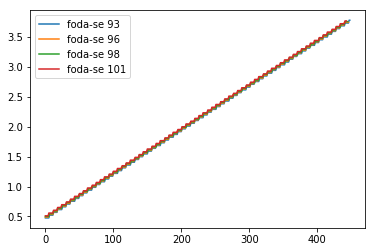

In [10]:
# for i, track in enumerate(listOfTracks):
#     if(len(track.amplitude) > 40 ) :
#         for j, track2 in enumerate(listOfTracks):
#             if(len(track2.amplitude) > 40 ) :
#                 def getDiff(position): 
#                     diff = np.array(position(track)) - np.array(position(track))
#                     if diff > 0:
#                         return np.array(track2.amplitude) - np.array(track.amplitude)
#                     else:
#                         return np.array(track2.amplitude) - np.array(track.amplitude)
#                     jacoud = getDiff(lambda x: x.initial_frame)
#                     jacoud = getDiff(lambda x: x.final_frame)
                    
#                 print()
#                 if sum(jacoud) > 10*(-4):
#                     print(sum(jacoud))
#                     plt.plot(jacoud)

for i, track in enumerate(listOfTracks):
    if(len(track.amplitude) > 40 ) :   
        plt.plot(range(len(track.frequency)),track.frequency, label='foda-se %i' % i)
        plt.legend()

In [ ]:
part_1 = (listOfTracks[win].getFrequency())
                divisor = part_1[j-1 -listOfTracks[win].getInitialFrame()]
                if (dif/divisor > freq_dist_thresh): # The peak is too far away from the peaks of the previous frame
                    x = Track(j-1,f[f_bin],power[coord]) # a new track is born
                    listOfTracks.append(x)    
                else :
                    (listOfTracks[win].frequency).append(f[f_bin])
                    (listOfTracks[win].amplitude).append(power[coord])
                listOfCoords.remove(coord)